# **Import Necessary libraries and  Model class**

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler


# Create Train and Test Data

In [26]:
train_dir="/kaggle/input/fashionmnist/fashion-mnist_train.csv"
test_dir = "/kaggle/input/fashionmnist/fashion-mnist_test.csv"
train = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)
train.iloc[:, 1:] = train.iloc[:, 1:].astype(np.float32) / 255.0
trainX = train.iloc[:, 1:]
trainY = train.iloc[:, 0]

testX = test.iloc[:, 1:]
testY = test.iloc[:, 0]

trainX = np.reshape(trainX, (-1, 28, 28, 1))
testX = np.reshape(testX, (-1, 28, 28, 1))

# Analyse the dataset's size, images, number of classes and other features

Number of training images: 60000
Number of training classes: 10
Number of test images: 10000
Number of test classes: 10


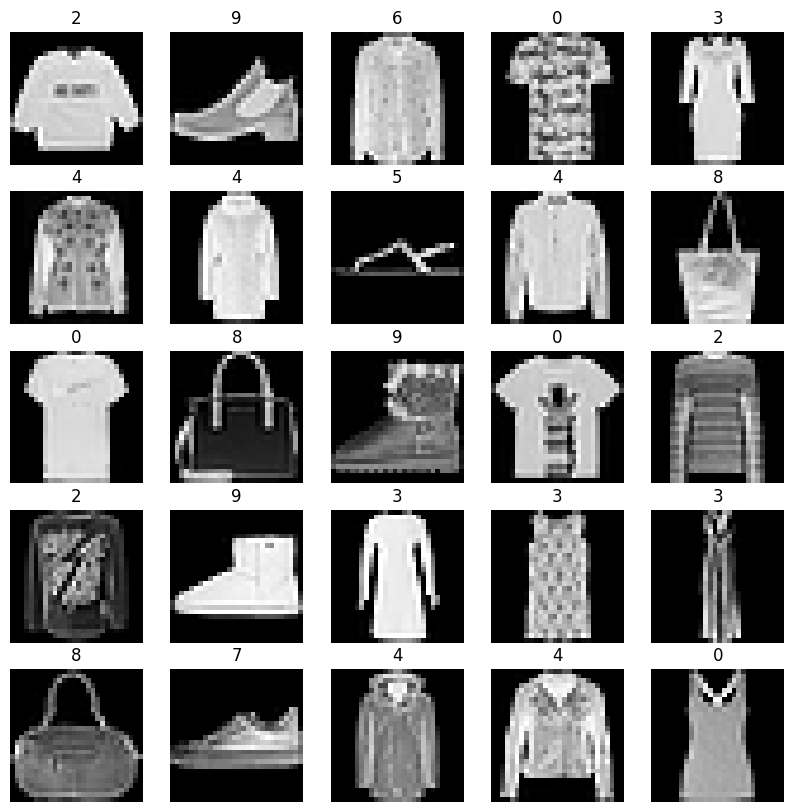

In [27]:

# Explore the dataset
print("Number of training images:", trainX.shape[0])
print("Number of training classes:", len(np.unique(trainY)))
print("Number of test images:", testX.shape[0])
print("Number of test classes:", len(np.unique(testY)))

# Visualize some of the training images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(trainX[i], cmap="gray")
    plt.title(trainY[i])
    plt.axis("off")
plt.show()


# **Define the model architecture. The model has two convolutional layers, each followed by a max pooling layer. The convolutional layers extract features from the input images, and the max pooling layers reduce the spatial size of the feature maps.
# The output of the convolutional layers is flattened and fed into two fully connected layers. The fully connected layers learn to classify the extracted features.**

In [28]:
# Define the model architecture
model = Sequential()

# Add the convolutional layers
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.25))
# Flatten the output of the convolutional layers
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(10, activation="sigmoid"))


# Compile the model. The loss argument specifies the loss function to use. The optimizer argument specifies the optimization algorithm to use. The metrics argument specifies the metrics to track during training and evaluation.

In [29]:
# Compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer="adam", metrics=["accuracy"])


# Import the ReduceLROnPlateau callback class and creates a callback instance. The ReduceLROnPlateau callback reduces the learning rate if the validation loss does not improve for three epochs.

In [30]:

lr_reducer = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.1)


# Train the model on the training data. The trainX and trainY arguments specify the training data and labels, respectively. The epochs argument specifies the number of epochs to train the model for. The callbacks argument specifies the callbacks to use during training.

In [31]:
# Train the model with the callback
# model.fit(trainX, trainY, epochs=15, callbacks=[lr_reducer])

model.fit(trainX, trainY, epochs=15, validation_data=(testX, testY), callbacks=[lr_reducer])



Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-11-02 12:30:11.624964: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 9s 4ms/step - loss: 0.5142 - accuracy: 0.8123 - val_loss: 38.0161 - val_accuracy: 0.8670 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3557 - accuracy: 0.8703 - val_loss: 29.4624 - val_accuracy: 0.8868 - lr: 0.0010
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3077 - accuracy: 0.8872 - val_loss: 31.6016 - val_accuracy: 0.8779 - lr: 0.0010
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2812 - accuracy: 0.8956 - val_loss: 30.4534 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2604 - accuracy: 0.9043 - val_loss: 39.8141 - val_accuracy: 0.8574 - lr: 0.0010
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2159 - accuracy: 0.9199 - val_loss: 36.4632 - val_accuracy: 0.8676 - lr: 1.0000e-04
Epoch 7/15
1875/1875 [==============================] - 7s 

# Calculate Test Accuracy and Loss

In [32]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(testX, testY)


313/313 [==============================] - 1s 3ms/step - loss: 37.8180 - accuracy: 0.8679
